Loading dataset...


<ipython-input-1-b1ec529439b7>:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'], index_col='datetime')
<ipython-input-1-b1ec529439b7>:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'], index_col='datetime')


Streaming output truncated to the last 5000 lines.
Processing chunk 11440...
Data Chunk HMAC: 4381490770345dec089f352b49094b34783f554a14d5261308df788238642f35
System Normal: No threat detected.

Processing chunk 11441...
Data Chunk HMAC: 9350cb290adc2f5aa6162e6184ea265059ad34a7d552a5fb00e6324aff3d3237
System Normal: No threat detected.

Processing chunk 11442...
Emergency Alarm: Threat detected! Threat score: 0.6075278054669118

Processing chunk 11443...
Emergency Alarm: Threat detected! Threat score: 0.5529776574202298

Processing chunk 11444...
Emergency Alarm: Threat detected! Threat score: 0.9946263809458683

Processing chunk 11445...
Data Chunk HMAC: ee4c16728e7d9f2412fb92d6c0ef8abbb78ac32f85071c1dfb444730e485b707
System Normal: No threat detected.

Processing chunk 11446...
Emergency Alarm: Threat detected! Threat score: 0.9852129772056665

Processing chunk 11447...
Data Chunk HMAC: f9b0f05443e39b285367efcaa3328e1f815352550de22f1e6f28c0d35b1b332f
System Normal: No threat detected

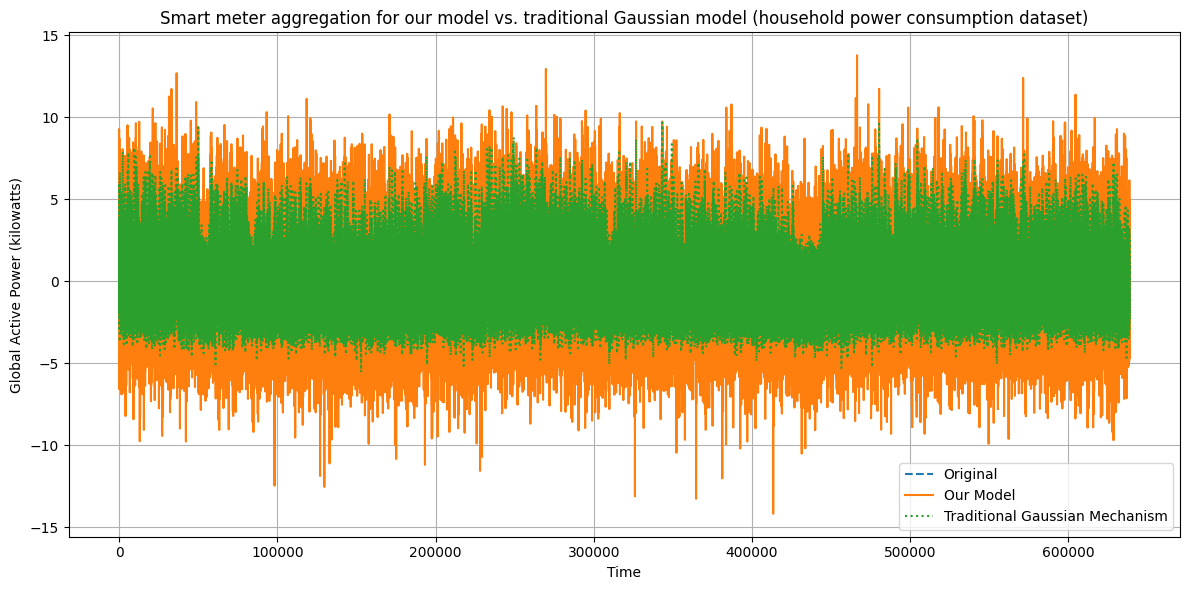

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hashlib
import hmac

# Step 1: Load and preprocess the dataset
print("Loading dataset...")
data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?'], index_col='datetime')
print("Dataset loaded successfully.")

# Example preprocessing
print("Preprocessing dataset...")
# Filling missing values
data.fillna(method='ffill', inplace=True)

# Selecting the 'Global_active_power' column as the feature of interest
features = ['Global_active_power']
data = data[features].dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("Dataset preprocessed successfully.\n")

# Step 2: Quantum Key Distribution (QKD) - Placeholder for actual QKD implementation
def qkd_key_generation():
    print("Generating QKD key...")
    return np.random.bytes(32)  # Example: Randomly generating a 256-bit key

qkd_key = qkd_key_generation()
print("QKD key generated.\n")

# Step 3: Reference Control and Support System (RCISS)
def rciss_verify(data_chunk, key):
    # Placeholder for actual verification logic
    threshold = 0.5  # Example threshold for verification
    threat_score = np.random.rand()  # Simulated threat score
    verified = threat_score < threshold  # Verification based on threshold
    return verified, threat_score

# Step 4: GIS-based Emergency Alarm - Placeholder for actual GIS integration
def gis_emergency_alarm(threat_detected, threat_score=None):
    if threat_detected:
        print(f"Emergency Alarm: Threat detected! Threat score: {threat_score}")
    else:
        print("System Normal: No threat detected.")

# Differential Privacy Mechanism
def apply_differential_privacy(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, data.shape)
    return data + noise

# Cryptographic Methods
def generate_hmac(key, message):
    return hmac.new(key, message.encode('utf-8'), hashlib.sha256).hexdigest()

# Simulating the process
print("Starting model processing...")
epsilon = 1.0  # Differential privacy parameter
sensitivity = 1.0  # Sensitivity of the data

original_data = []
private_data_chunks = []
traditional_gaussian_data_chunks = []

for i in range(0, len(scaled_data), 100):  # Processing in chunks of 100 rows
    data_chunk = scaled_data[i:i+100]

    print(f"\nProcessing chunk {i//100 + 1}...")

    # RCISS Verification
    verified, threat_score = rciss_verify(data_chunk, qkd_key)
    if not verified:
        gis_emergency_alarm(threat_detected=True, threat_score=threat_score)
        continue  # Skip further processing for this chunk

    original_data.extend(data_chunk.flatten())

    # Apply Differential Privacy
    private_data_chunk = apply_differential_privacy(data_chunk, epsilon, sensitivity)
    private_data_chunks.extend(private_data_chunk.flatten())

    # Traditional Gaussian Mechanism for comparison
    traditional_gaussian_chunk = data_chunk + np.random.normal(0, sensitivity / epsilon, data_chunk.shape)
    traditional_gaussian_data_chunks.extend(traditional_gaussian_chunk.flatten())

    # Generate HMAC for the data chunk
    data_chunk_hmac = generate_hmac(qkd_key, str(private_data_chunk))
    print(f"Data Chunk HMAC: {data_chunk_hmac}")

    # GIS Emergency Alarm (if threat detected in the data)
    gis_emergency_alarm(threat_detected=False)

print("\nModel processing completed.")

# Adjust the time axis to match the length of the processed data
time_axis = np.arange(len(original_data))
plt.figure(figsize=(12, 6))
plt.plot(time_axis, original_data, label='Original', linestyle='--')
plt.plot(time_axis, private_data_chunks, label='Our Model')
plt.plot(time_axis, traditional_gaussian_data_chunks, label='Traditional Gaussian Mechanism', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Smart meter aggregation for our model vs. traditional Gaussian model (household power consumption dataset)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
